In [2]:
#import h5py
import os
import scipy.io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob, os
import matplotlib.patches as patches
sns.set_style('darkgrid')
import pickle

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import plotly.plotly as py
import plotly.graph_objs as go

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

os.chdir("/Users/trongnguyen/Dropbox/FattyLiver/src/hydrogen/")
from helper_brl.frequencyAnalysis import averagePS, plotROI, plot_all_ROIs, \
get_train_test_data, FrequencySpectrum, get_phantom_training
path_to_file = "/Users/trongnguyen/Dropbox/FattyLiver/data/Reference_free/02-18-2018-Generic/"

sns.set_context("poster", rc={"font.size":24,"axes.titlesize":24,"axes.labelsize":24}) 
import matplotlib 
matplotlib.rc('xtick', labelsize=18) 
matplotlib.rc('ytick', labelsize=18) 

from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Convolution1D, MaxPooling1D, Conv1D
from sklearn.utils import shuffle
from keras.callbacks import TensorBoard
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import StandardScaler
from itertools import combinations

Using TensorFlow backend.


In [45]:
phantom_name = 'black1'
sonix_settings = ['power_5', 'power_5_middle_tgc', 'power_0']

In [8]:
%run /Users/trongnguyen/Dropbox/FattyLiver/src/py_files/ultrasonix.py

In [10]:
folder_path = "/Volumes/My Passport/02-19-2018-Generic/"
file_path = folder_path + phantom_name + '/'
file_name = phantom_name + '_' + sonix_settings[0] + '.rf'

Im1, header1 = rp_read(file_path + file_name)

In [11]:
file_name = phantom_name + '_' + sonix_settings[1] + '.rf'

Im2, header2 = rp_read(file_path + file_name)

In [46]:
file_name = phantom_name + '_' + sonix_settings[2] + '.rf'

Im3, header3 = rp_read(file_path + file_name)

In [66]:
frame1 = Im1[:,:, 50]

In [67]:
frame2 = Im2[:,:, 50]

In [68]:
frame3 = Im3[:,:, 100]

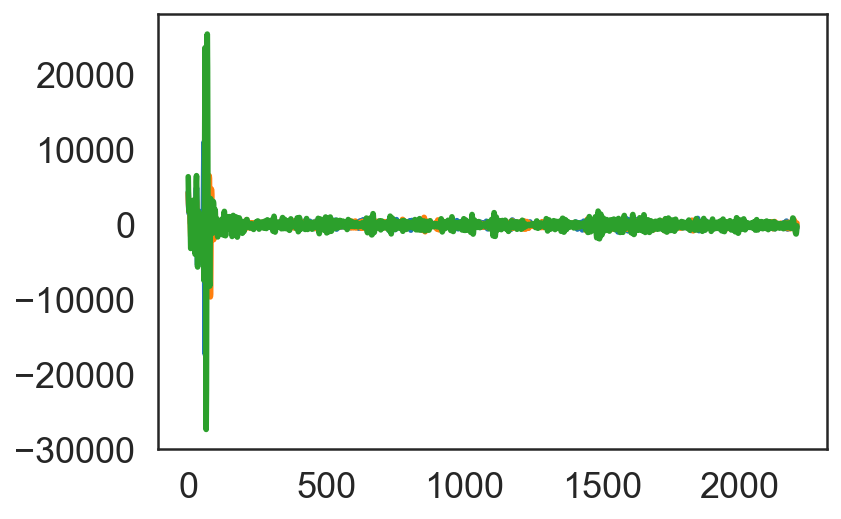

In [69]:
plt.plot(frame1[:, 120])
plt.plot(frame2[:, 120])
plt.plot(frame3[:, 120])

In [21]:
from helper_brl.frequencyAnalysis import displayBmode

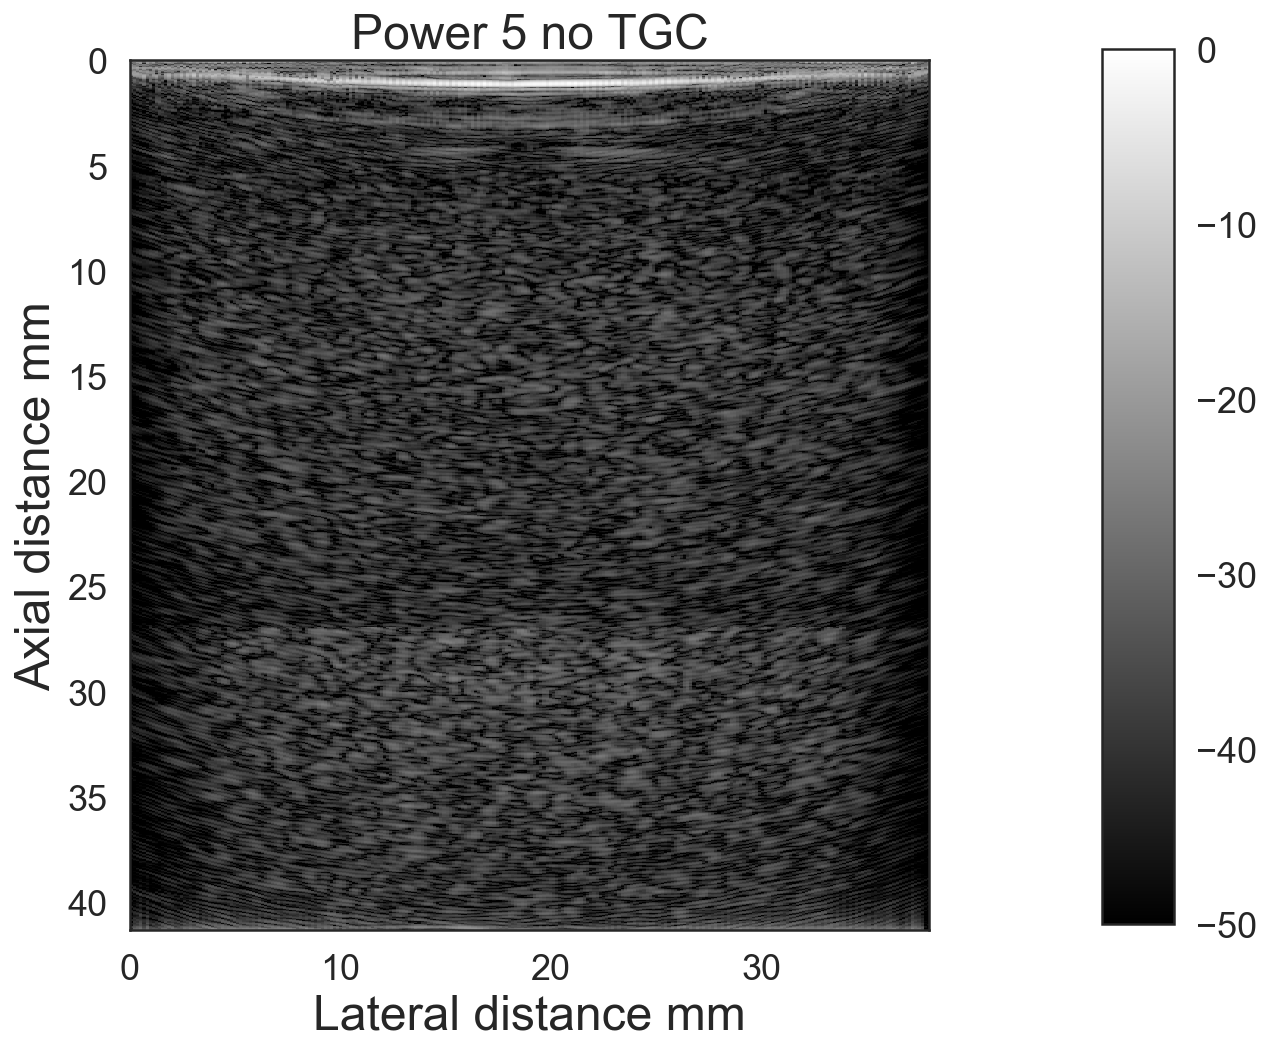

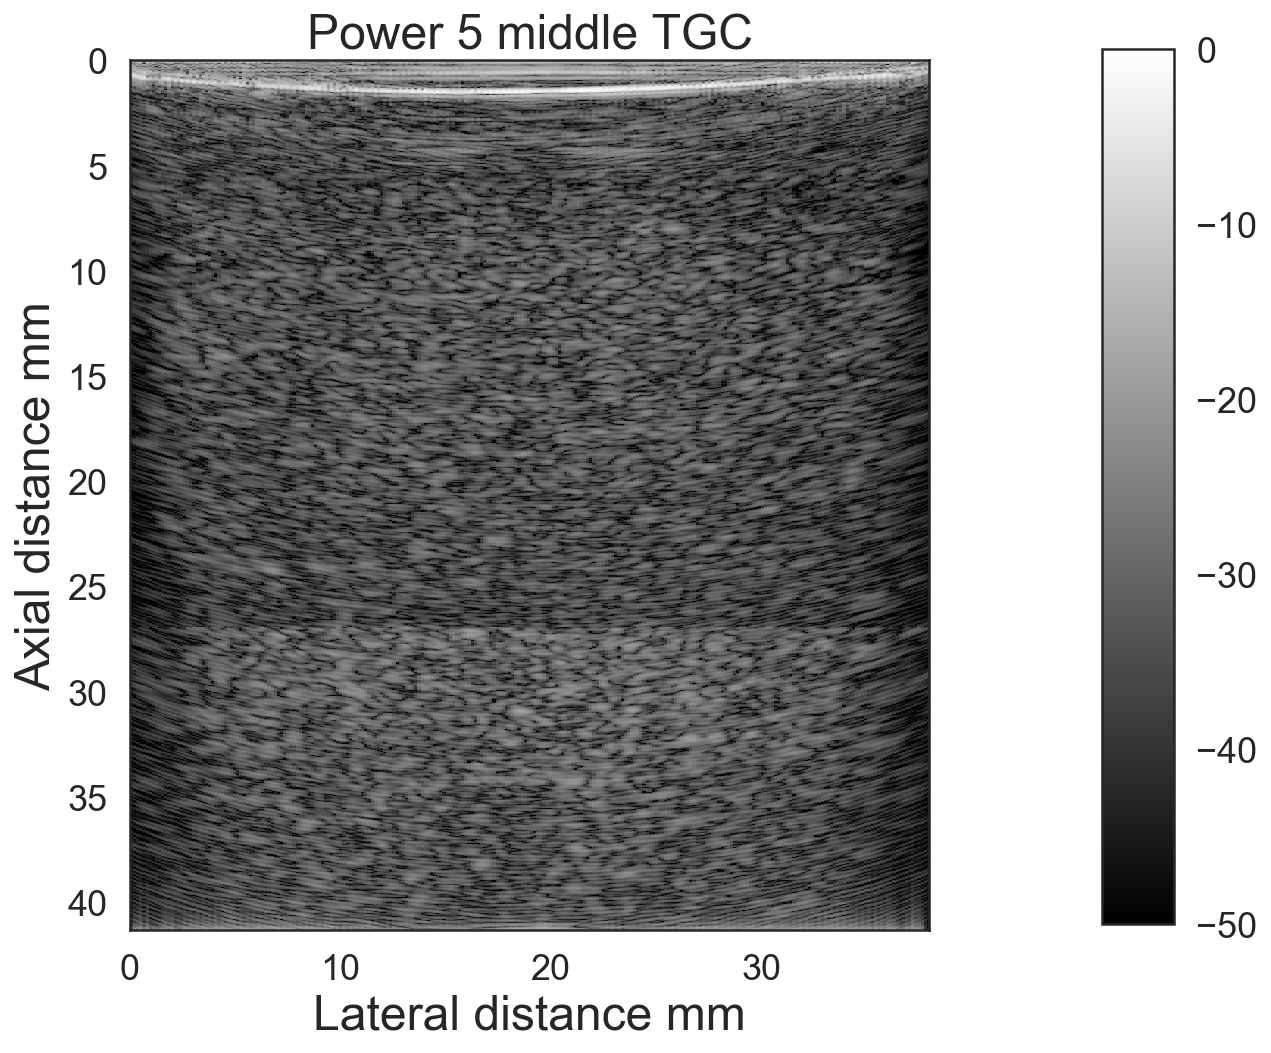

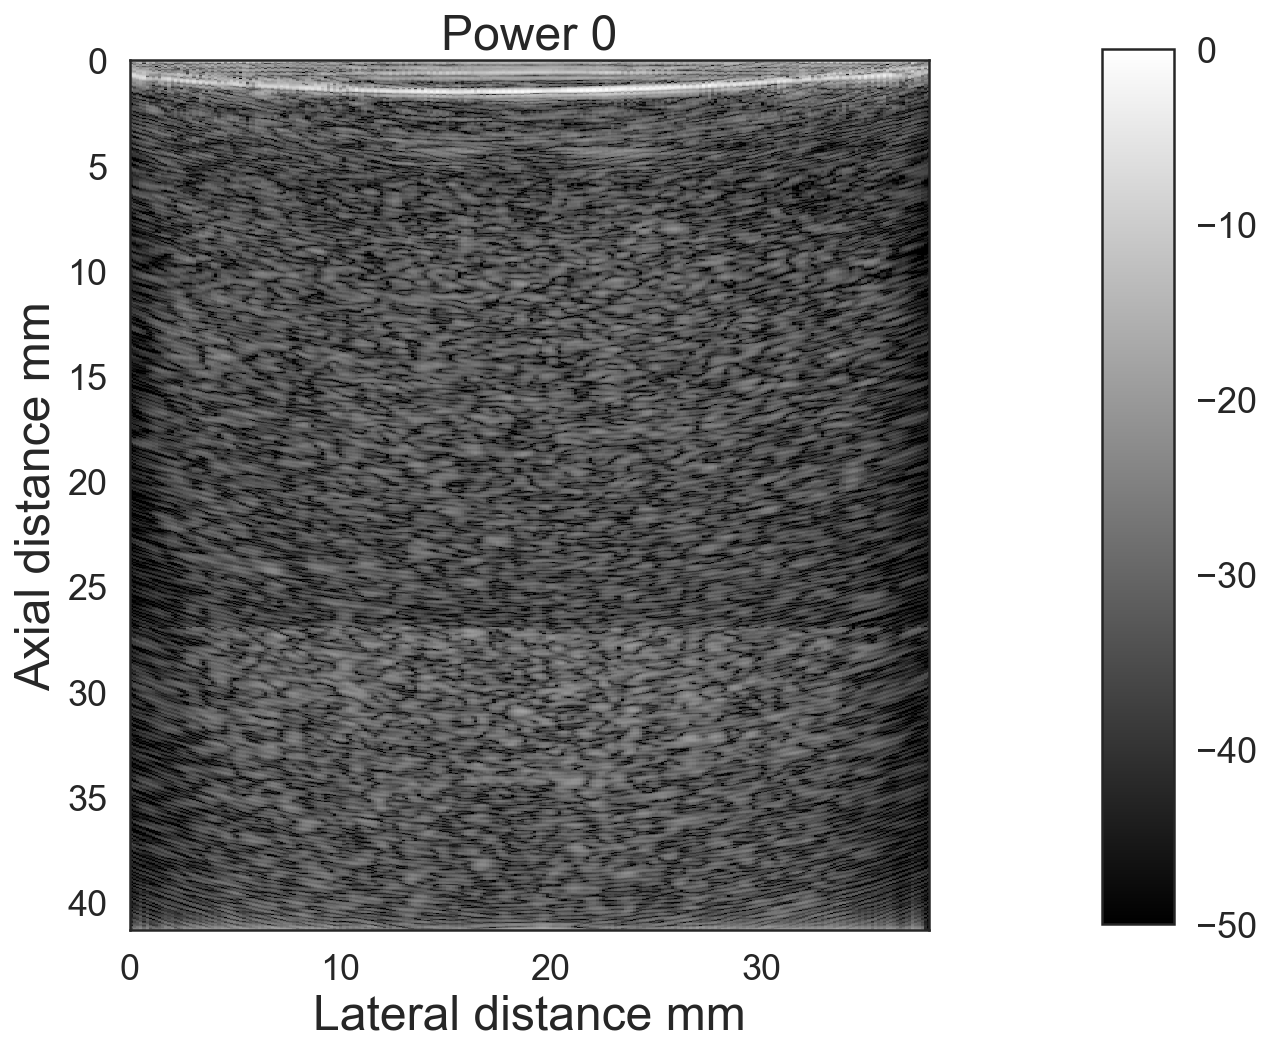

In [36]:
sns.set_style('white')
displayBmode(frame1, 50, 'Power 5 no TGC')
displayBmode(frame2, 50, 'Power 5 middle TGC')
displayBmode(frame3, 50, 'Power 0')

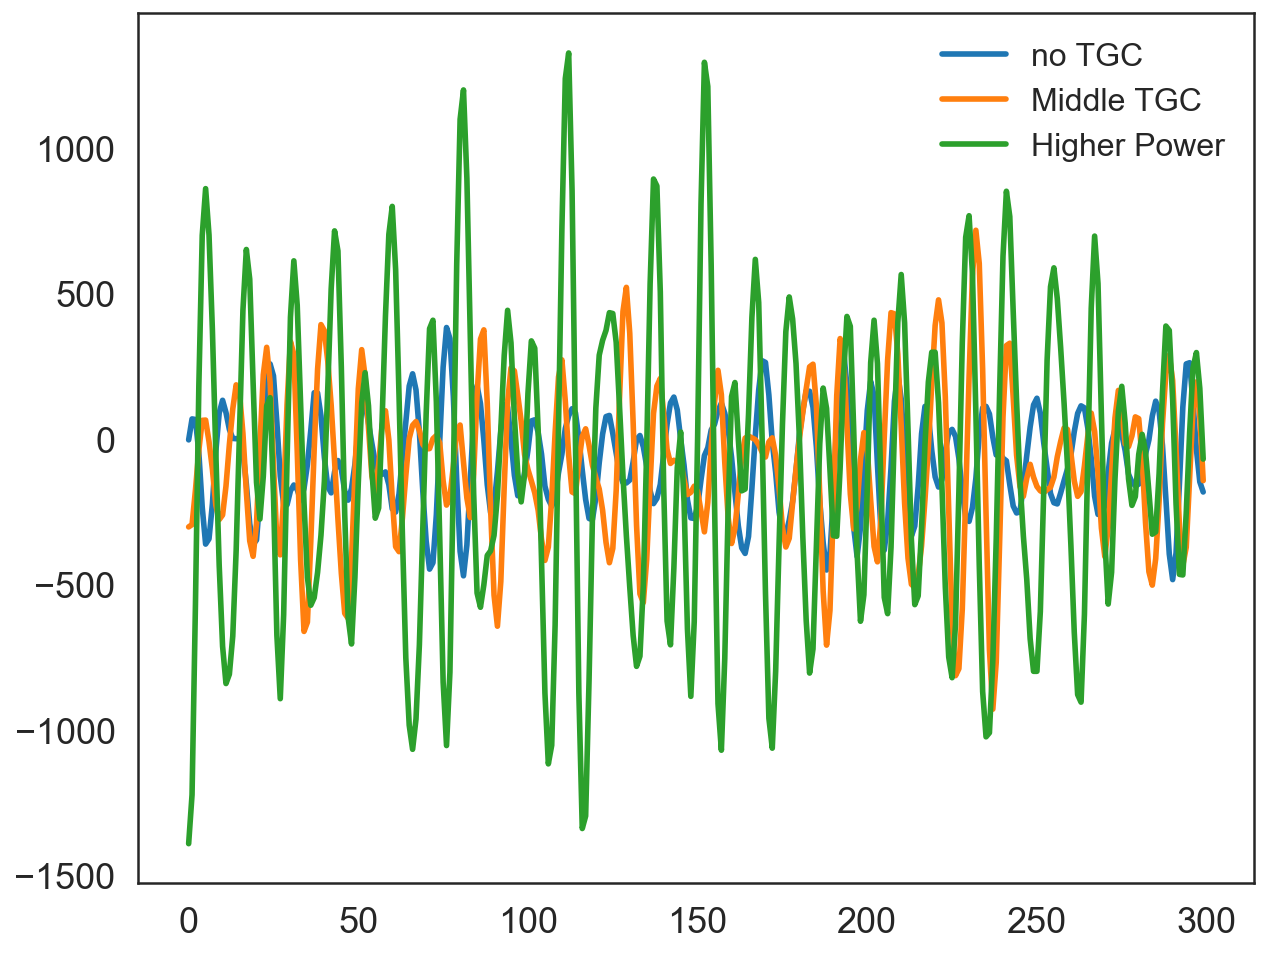

In [71]:
plt.figure(figsize = (10, 8))
plt.plot(frame1[1500:1800, 20], label = 'no TGC')
plt.plot(frame2[1500:1800, 120], label = 'Middle TGC')
plt.plot(frame3[1500:1800, 120], label = 'Higher Power')
plt.legend()

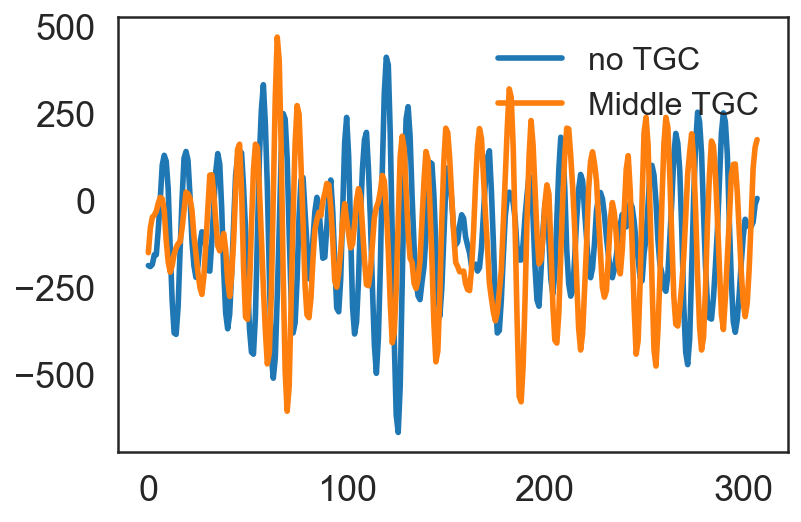

In [73]:
plt.plot(frame1[1900:, 30], label = 'no TGC')
plt.plot(frame2[1900:, 30], label = 'Middle TGC')
plt.legend()

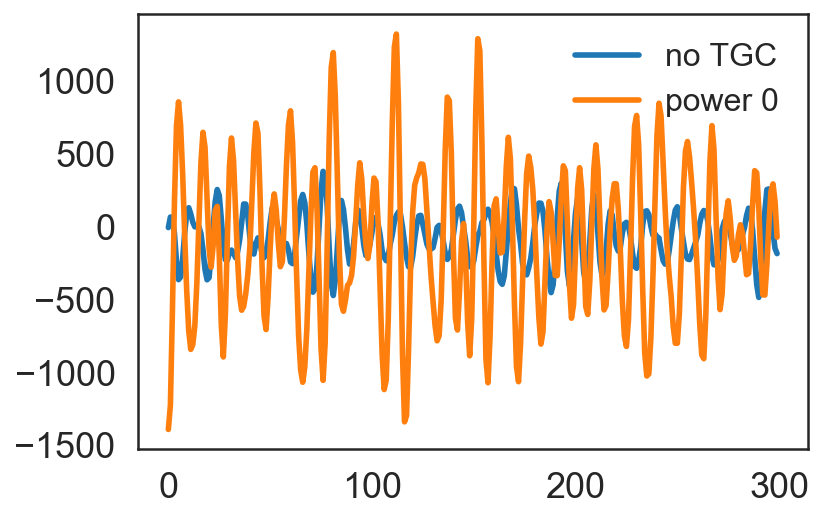

In [74]:
plt.plot(frame1[1500:1800, 20], label = 'no TGC')
plt.plot(frame3[1500:1800, 120], label = 'power 0')
plt.legend()